# Heart Disease Dataset


Datasets (cleveland.data, hungarian.data, switzerland.data and long-beach-va.data) were obtained from the UCI Machine Learning Repository. 


Each dataset contained 76 attributes but only 14 (including the target feature) were used in these analyses.

Number of Instances: 
    Database:# of instances:
    Cleveland: 303
    Hungarian: 294
    Switzerland: 123
    Long Beach VA: 200
    
Attribute Information: Only 14 used
   
      -- 1. age: age in years    
      -- 2. sex: (1 = male; 0 = female) 
      -- 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      
      -- 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

      -- 5. chol: serum cholestoral in mg/dl     
      -- 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)     
      -- 7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy

      -- 8. thalach: maximum heart rate achieved
      -- 9. exang: exercise induced angina (1 = yes; 0 = no)    
      -- 10. oldpeak: ST depression induced by exercise relative to rest   
      -- 11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

      -- 12. ca: number of major vessels (0-3) colored by flourosopy        
      -- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect      
      -- 14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
      (the predicted attribute)


Missing Attribute Values: Several.  Distinguished with value ? and -9.


**Objective:**
To predict if a person has heart disease. 0-No presence 1-Presence

# Exploratory Data Analysis

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# cleveland dataset

In [2]:
clev=pd.read_csv("processed_cleveland.csv",header=None)
clev.columns=['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Goal']

In [3]:
clev.head()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
clev.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [5]:
clev.shape

(303, 14)

In [6]:
clev.size

4242

In [7]:
clev.ndim

2

In [8]:
clev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age         303 non-null float64
Sex         303 non-null float64
CP          303 non-null float64
Trestbps    303 non-null float64
Chol        303 non-null float64
FBS         303 non-null float64
RestECG     303 non-null float64
Thalach     303 non-null float64
Exang       303 non-null float64
Oldpeak     303 non-null float64
Slope       303 non-null float64
CA          303 non-null object
Thal        303 non-null object
Goal        303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [9]:
clev.describe()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,Goal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [10]:
clev.replace("?",np.NaN,inplace=True)

In [11]:
clev.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [12]:
clev.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          4
Thal        2
Goal        0
dtype: int64

In [13]:
#fill NaN with median
clev["CA"]=clev["CA"].fillna(clev["CA"].median())
clev["Thal"]=clev["Thal"].fillna(clev["Thal"].median())

In [14]:
clev.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Goal        0
dtype: int64

# switzerland dataset

In [15]:
swiz=pd.read_csv("processed_switzerland.csv",header=None)
swiz.columns=['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Goal']

In [16]:
swiz.head()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [17]:
swiz.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1
122,74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


In [18]:
swiz.shape

(123, 14)

In [19]:
swiz.size

1722

In [20]:
swiz.ndim

2

In [21]:
swiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
Age         123 non-null int64
Sex         123 non-null int64
CP          123 non-null int64
Trestbps    123 non-null object
Chol        123 non-null int64
FBS         123 non-null object
RestECG     123 non-null object
Thalach     123 non-null object
Exang       123 non-null object
Oldpeak     123 non-null object
Slope       123 non-null object
CA          123 non-null object
Thal        123 non-null object
Goal        123 non-null int64
dtypes: int64(5), object(9)
memory usage: 13.5+ KB


In [22]:
swiz.describe()

,Age,Sex,CP,Chol,Goal
count,123.000000,123.000000,123.000000,123.0,123.000000
mean,55.317073,0.918699,3.699187,0.0,1.804878
std,9.032108,0.274414,0.688726,0.0,1.013503
min,32.000000,0.000000,1.000000,0.0,0.000000
25%,51.000000,1.000000,4.000000,0.0,1.000000
50%,56.000000,1.000000,4.000000,0.0,2.000000
75%,61.500000,1.000000,4.000000,0.0,3.000000
max,74.000000,1.000000,4.000000,0.0,4.000000


In [23]:
swiz.replace("?",np.NaN,inplace=True)

In [24]:
swiz.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
118,70,1,4,115,0,0,1,92,1,0,2,NaN,7,1
119,70,1,4,140,0,1,0,157,1,2,2,NaN,7,3
120,72,1,3,160,0,NaN,2,114,0,1.6,2,2,NaN,0
121,73,0,3,160,0,0,1,121,0,0,1,NaN,3,1
122,74,1,2,145,0,NaN,1,123,0,1.3,1,NaN,NaN,1


In [25]:
swiz.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      2
Chol          0
FBS          75
RestECG       1
Thalach       1
Exang         1
Oldpeak       6
Slope        17
CA          118
Thal         52
Goal          0
dtype: int64

In [26]:
#replace NaN vaues with median
swiz.fillna(swiz.median(),inplace=True)

In [27]:
swiz.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Goal        0
dtype: int64

# long beach va dataset

In [28]:
va=pd.read_csv("processed_va.csv",header=None)
va.columns=['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Goal']

In [29]:
va.head()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [30]:
va.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [31]:
va.shape

(200, 14)

In [32]:
va.size

2800

In [33]:
va.ndim

2

In [34]:
va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
Age         200 non-null int64
Sex         200 non-null int64
CP          200 non-null int64
Trestbps    200 non-null object
Chol        200 non-null object
FBS         200 non-null object
RestECG     200 non-null int64
Thalach     200 non-null object
Exang       200 non-null object
Oldpeak     200 non-null object
Slope       200 non-null object
CA          200 non-null object
Thal        200 non-null object
Goal        200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [35]:
va.describe()

,Age,Sex,CP,RestECG,Goal
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [36]:
va.replace("?",np.NaN,inplace=True)

In [37]:
va.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0
199,62,1,2,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [38]:
va.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps     56
Chol          7
FBS           7
RestECG       0
Thalach      53
Exang        53
Oldpeak      56
Slope       102
CA          198
Thal        166
Goal          0
dtype: int64

In [39]:
#replace NaN vaues with median
va.fillna(va.median(),inplace=True)

In [40]:
va.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Goal        0
dtype: int64

# hungarian dataset

In [41]:
hung=pd.read_csv("reprocessed.hungarian.txt",sep=" ",header=None,skipfooter=1,engine='python')
hung.columns=['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Goal']

In [42]:
hung.head()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0


In [43]:
hung.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0
293,53,1,4,130,182,0,0,148,0,0.0,-9,-9,-9,0


In [44]:
hung.shape

(294, 14)

In [45]:
hung.size

4116

In [46]:
hung.ndim

2

In [47]:
hung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
Age         294 non-null int64
Sex         294 non-null int64
CP          294 non-null int64
Trestbps    294 non-null int64
Chol        294 non-null int64
FBS         294 non-null int64
RestECG     294 non-null int64
Thalach     294 non-null int64
Exang       294 non-null int64
Oldpeak     294 non-null float64
Slope       294 non-null int64
CA          294 non-null int64
Thal        294 non-null int64
Goal        294 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.2 KB


In [48]:
hung.describe()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


In [49]:
hung.replace(-9,np.NaN,inplace=True)


In [50]:
hung.tail()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,Goal
289,48,0,2,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0
290,36,1,2,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0
291,48,1,3,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0
292,47,0,2,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0
293,53,1,4,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0


In [51]:
hung.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      1
Chol         23
FBS           8
RestECG       1
Thalach       1
Exang         1
Oldpeak       0
Slope       190
CA          290
Thal        266
Goal          0
dtype: int64

In [52]:
#filling NaN values with median
hung.fillna(hung.median(),inplace=True)

In [53]:
hung.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Goal        0
dtype: int64

# concatenating the 4 datasets in one single dataframe

In [54]:
df=pd.concat([clev,swiz,va,hung],ignore_index=True)
df.shape

(920, 14)

In [55]:
df.Goal.value_counts()

0    411
1    196
3    135
2    135
4     43
Name: Goal, dtype: int64

In [56]:
df["Goal"].replace(3,1,inplace=True)
df["Goal"].replace(2,1,inplace=True)
df["Goal"].replace(4,1,inplace=True)

In [57]:
df.Goal.value_counts()

1    509
0    411
Name: Goal, dtype: int64

# Separating the x and y columns

In [58]:
x=df.drop("Goal",axis=1)
x.head()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0


In [59]:
y=df.Goal
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Goal, dtype: int64

# Boxplot

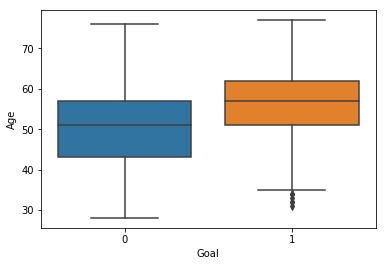

In [60]:
  sns.boxplot(x="Goal",y="Age",data=df)

Observation(s):

1) The median age for people who showed absense of heart disease is 52.

2) The median age for people who showed presence of heart disease is 58.

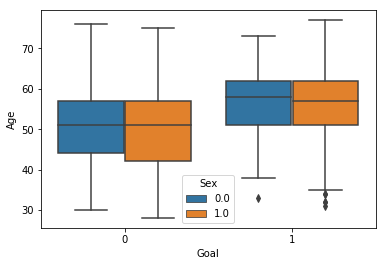

In [61]:
  sns.boxplot(x="Goal",y="Age",hue="Sex",data=df)

# split into training data and test data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [63]:
x_train.shape

(736, 13)

In [64]:
x_test.shape

(184, 13)

# Training the model using KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [66]:
test_accuracy=[]
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import auc,roc_curve
for k in range(1,50,3):
    print("K=",k)
    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    print("train confusion matrix")
    print(confusion_matrix(y_train,neigh.predict(x_train)))
    print("test confusion matrix")
    print(confusion_matrix(y_test,neigh.predict(x_test)))
    print(accuracy_score(y_test,neigh.predict(x_test)))
    print("*"*50)
    test_accuracy.append(accuracy_score(y_test,neigh.predict(x_test)))

K= 1
train confusion matrix
[[323   0]
 [  0 413]]
test confusion matrix
[[48 40]
 [26 70]]
0.6413043478260869
**************************************************
K= 4
train confusion matrix
[[275  48]
 [120 293]]
test confusion matrix
[[67 21]
 [26 70]]
0.7445652173913043
**************************************************
K= 7
train confusion matrix
[[220 103]
 [ 74 339]]
test confusion matrix
[[60 28]
 [19 77]]
0.7445652173913043
**************************************************
K= 10
train confusion matrix
[[237  86]
 [107 306]]
test confusion matrix
[[64 24]
 [24 72]]
0.7391304347826086
**************************************************
K= 13
train confusion matrix
[[211 112]
 [ 86 327]]
test confusion matrix
[[62 26]
 [21 75]]
0.7445652173913043
**************************************************
K= 16
train confusion matrix
[[228  95]
 [107 306]]
test confusion matrix
[[62 26]
 [19 77]]
0.7554347826086957
**************************************************
K= 19
train confusion mat

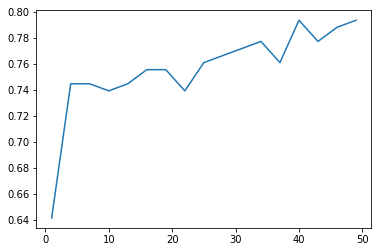

In [67]:
k=np.arange(1,50,3)
plt.plot(k,test_accuracy)

In [68]:
neigh=KNeighborsClassifier(n_neighbors=49)
neigh.fit(x_train,y_train)
print("test confusion matrix")
print(confusion_matrix(y_test,neigh.predict(x_test)))

test confusion matrix
[[58 30]
 [ 8 88]]


# Calculating the accuracy, precision, recall,f1 score

In [69]:
pred=neigh.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print("accuracy: ",accuracy)

accuracy:  0.7934782608695652


In [70]:
precision=precision_score(y_test,pred)
print("precision: ",precision)

precision:  0.7457627118644068


In [71]:
recall=recall_score(y_test,pred)
print("recall: ",recall)

recall:  0.9166666666666666


In [72]:
f1=f1_score(y_test,pred)
print("f1 score: ",f1)

f1 score:  0.822429906542056
